In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
# Load the dataset
data = pd.read_csv('TSLA.csv')

In [42]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,30-06-2010,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,01-07-2010,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,02-07-2010,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,06-07-2010,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3288,24-07-2023,255.850006,269.850006,254.119995,269.059998,269.059998,136508500
3289,25-07-2023,272.380005,272.899994,265.000000,265.279999,265.279999,112757300
3290,26-07-2023,263.250000,268.040009,261.750000,264.350006,264.350006,95856200
3291,27-07-2023,268.309998,269.130005,255.300003,255.710007,255.710007,103697300


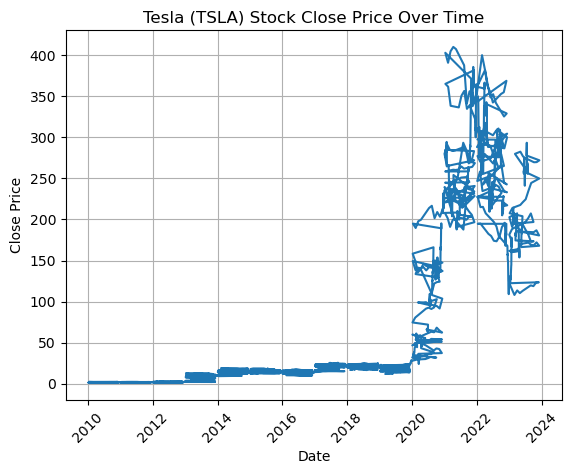

In [63]:
# Convert the 'Date' column to a datetime object
data['Date'] = pd.to_datetime(data['Date'])

# Plotting the "Close" price over time
plt.plot(data['Date'], data['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Tesla (TSLA) Stock Close Price Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

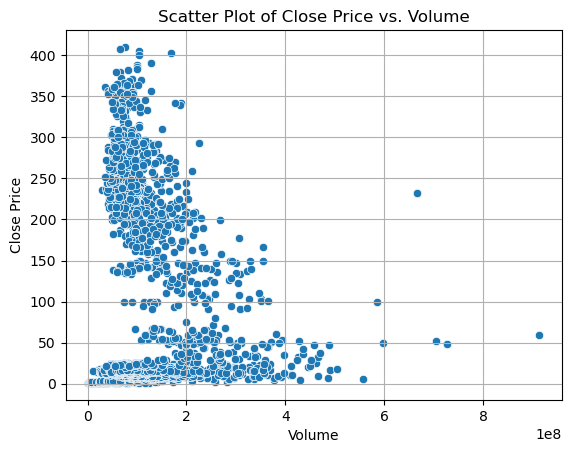

In [44]:
# Scatter Plot
sns.scatterplot(x='Volume', y='Close', data=data)
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.title('Scatter Plot of Close Price vs. Volume')
plt.grid(True)
plt.show()

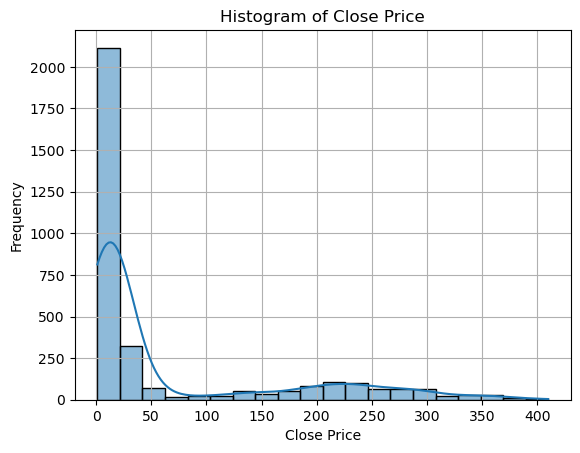

In [45]:
# Histogram
sns.histplot(data['Close'], bins=20, kde=True)
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.title('Histogram of Close Price')
plt.grid(True)
plt.show()

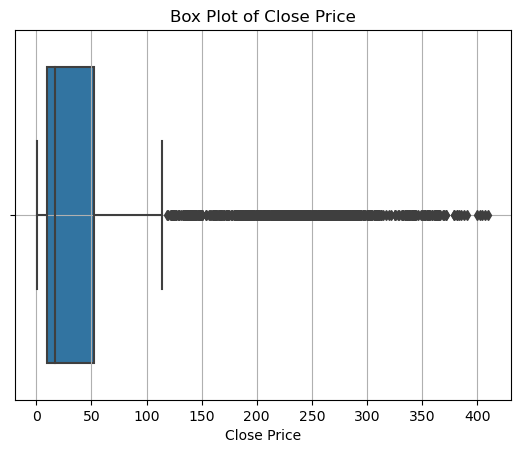

In [46]:
# Box Plot
sns.boxplot(x=data['Close'])
plt.xlabel('Close Price')
plt.title('Box Plot of Close Price')
plt.grid(True)
plt.show()

In [47]:
# Extract features and target variable
X = data[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
y = data['Close']

In [48]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Create and train the models
models = {
    'Linear Regression': LinearRegression(),
    'Support Vector Regression': SVR(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor()
}


In [50]:
# Dictionary to store the model's performance
performance = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    performance[name] = {'MSE': mse, 'R2 Score': r2}

In [51]:
# Display the performance of each model
print("Model Performance:")
for name, perf in performance.items():
    print(f"{name}:")
    print(f"  Mean Squared Error (MSE): {perf['MSE']}")
    print(f"  R-squared (R2) Score: {perf['R2 Score']}\n")

Model Performance:
Linear Regression:
  Mean Squared Error (MSE): 3.357603550154775e-17
  R-squared (R2) Score: 1.0

Support Vector Regression:
  Mean Squared Error (MSE): 11099.896741183513
  R-squared (R2) Score: -0.16955448672123663

Decision Tree Regression:
  Mean Squared Error (MSE): 0.2962246150614038
  R-squared (R2) Score: 0.9999687879233744

Random Forest Regression:
  Mean Squared Error (MSE): 0.19025633244156764
  R-squared (R2) Score: 0.9999799534038539

Gradient Boosting Regression:
  Mean Squared Error (MSE): 0.36513793407358913
  R-squared (R2) Score: 0.9999615267854265



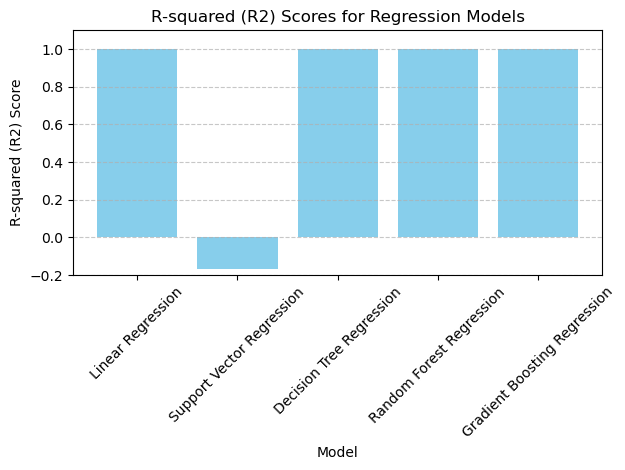

In [62]:
# Extract the R-squared scores and model names from the performance dictionary
model_names = list(performance.keys())
r2_scores = [perf['R2 Score'] for perf in performance.values()]

plt.bar(model_names, r2_scores, color='skyblue')
plt.xlabel('Model')
plt.ylabel('R-squared (R2) Score')
plt.title('R-squared (R2) Scores for Regression Models')
plt.ylim(-0.2, 1.1)  # Set the y-axis limit to [-0.1, 1.1] for a larger range
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [52]:
# Assuming the model has been trained and named "model"
# Example of making predictions on new data

new_data = pd.DataFrame({
    'Open': [750.0],
    'High': [760.0],
    'Low': [740.0],
    'Adj Close': [755.0],
    'Volume': [1000000]
})

# Predict the "Close" price for the new data point
predicted_close_price = model.predict(new_data)

print(f"Predicted Close Price: {predicted_close_price[0]}")


Predicted Close Price: 409.5858602257343


In [54]:
new_data = pd.DataFrame({
    'Open': [259.86],
    'High': [267.25],
    'Low': [258.23],
    'Adj Close': [266.44],
    'Volume': [111149300]
})

print("Predicted Close Price using all algorithms:")
for name, model in models.items():
    predicted_close_price = model.predict(new_data)
    print(f"{name}: {predicted_close_price[0]}")


Predicted Close Price using all algorithms:
Linear Regression: 266.4399999989578
Support Vector Regression: 22.7666323482514
Decision Tree Regression: 266.679993
Random Forest Regression: 266.4392259200001
Gradient Boosting Regression: 267.5122904885165
